# Case study: K-means

K-means is a simple algorithm to cluster data – that is to identify groups of similar objects based only on their properties. The algorithm is best-illustrated by the following graph:

<img src="images/kmeans_illustration.png" alt="drawing" width=800 >



## Loading data

We first need to load sample data

In [15]:
import numpy as np
import matplotlib.pylab as plt

data = np.loadtxt('data/kmeans_data.csv')
data.shape

(30, 2)

To visualise the data we can use the scatter function from matplotlib package:

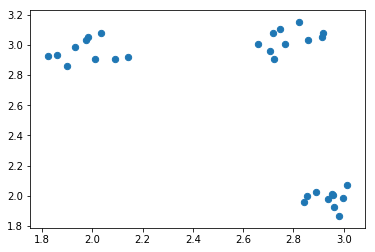

In [16]:
plt.scatter(data[:, 0], data[:, 1], s=40)

## Initialisation

In the first step of the algorithm we need to initialise the centers of the clusters. We will initialise them randomly but consistently with the mean and standard deviation of the data:

In [17]:
K = 3
centroids = np.random.randn(K, 2)

To center the cluster centroids on the data it’s better to normalise to the mean and standard deviation of the data:

In [18]:
centroids = centroids * np.std(data, 0)
centroids = centroids + np.mean(data, 0)

Let’s now plot the data and the random cluster centers on the same figure:

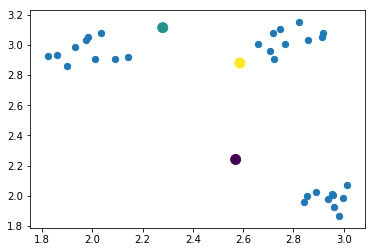

In [19]:
plt.scatter(data[:, 0], data[:, 1], s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(3), s=100)

We now need to assign each point to the closest cluster center. <br> First, we will calculate the Euclidean distance of each point to each of the centers. For this we can use the __broadcasting__:

In [20]:
data

array([[2.76699745, 3.00605901],
       [2.08809478, 2.90381099],
       [2.82268654, 3.14969639],
       [2.96035562, 1.9278771 ],
       [2.65912237, 3.00699101],
       [2.0329546 , 3.08106089],
       [2.85400832, 1.99980153],
       [1.85938708, 2.93227423],
       [2.97992252, 1.86682102],
       [2.99576316, 1.98559546],
       [2.01073572, 2.90854215],
       [2.84360137, 1.95581993],
       [3.01468494, 2.07181725],
       [2.95584876, 2.00254953],
       [2.95385335, 2.01422889],
       [2.72347887, 2.90977263],
       [1.82256374, 2.9252103 ],
       [2.91446894, 3.05433678],
       [2.74601409, 3.1048083 ],
       [1.89816233, 2.85769504],
       [2.70640919, 2.95768642],
       [2.85895647, 3.03312417],
       [2.93936445, 1.98082121],
       [2.71781119, 3.08253543],
       [2.91929334, 3.08057845],
       [1.98107071, 3.05056244],
       [2.89163948, 2.02318367],
       [1.92957669, 2.98597707],
       [2.14050487, 2.92158131],
       [1.97546003, 3.03506174]])

In [24]:
centroids.shape

(3, 2)

In [23]:
data[:, np.newaxis, :].shape

(30, 1, 2)

In [6]:
deltas = data[:, np.newaxis, :] - centroids
distances = np.sqrt(np.sum((deltas) ** 2, 2))

For each data point we find the center with minimum distance. We can use the argmin method with the axis argument:

In [7]:
closest = distances.argmin(1)

Now we plot the centroids and data points with the color-code reflecting cluster membership:

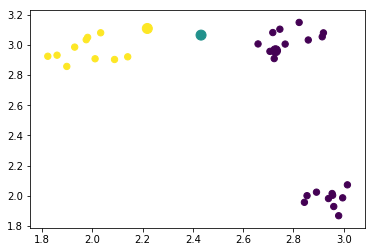

In [8]:
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(3), s=100)

## $\color{green}{\text{Excercise}}$  Calculate new cluster centers
Given the array of cluster assignments closest calculate the center coordinates of the first cluster (index 0). <br> __Note__: To calculate new centers of the clusters, we average all points belonging to that cluster. We can use a boolean mask

In [9]:
data[closest==0, :].mean(0)

array([2.86121402, 2.51070521])

To repeat it for all clusters we can use a for loop or list comprehension. Since the number of clusters is usually much smaller than the number of data points, this for loop won’t affect the performance of our algorithm:

In [10]:
centroids = np.array([data[closest == i, :].mean(0) for i in range(3)])

/home/mtelencz/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/mtelencz/anaconda3/envs/teaching/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Lets check the positions of new centers and assignment of points to clusters.

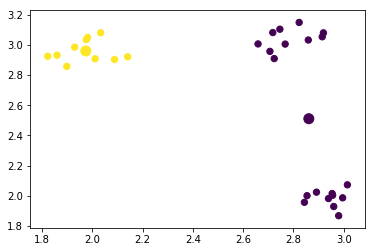

In [11]:
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(3), s=100)

## Iterations

Now we can repeat the steps of assigning point to clusters and updating the cluster centers iteratively and watch the progress of the algorithm:

In [12]:
for iteration in range(5):
   # assign points to clusters
   deltas = data[:, np.newaxis, :] - centroids
   distances = np.sqrt(np.sum((deltas) ** 2, 2))
   closest = distances.argmin(1)

   # calculate new centroids
   centroids = np.array([data[closest == i, :].mean(0) for i in range(3)])

/home/mtelencz/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  


## Single cluster?
Note that sometimes the algorithm can produce degenerate results – all of the points will be assigned to a single cluster (or final number of clusters will be less than K). This is one of drawbacks of K-means with random initialisations. A possible solution is to repeat the algorithm with other initialisations and find the best cluster assignment, but better solutions exist.

## Putting it all together

Our final script will look as the following:

/home/mtelencz/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.


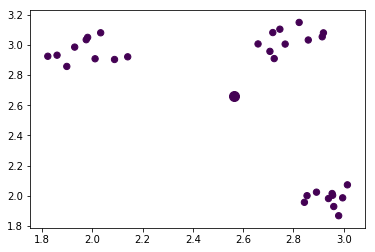

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/kmeans_data.csv')

# randomly initalize the centroids
K = 3
centroids = np.random.randn(K, 2)
centroids = centroids * np.std(data, 0)
centroids = centroids + np.mean(data, 0)

for iteration in range(5):
   # assign points to clusters
   deltas = data[:, np.newaxis, :] - centroids
   distances = np.sqrt(np.sum((deltas) ** 2, 2))
   closest = distances.argmin(1)

   # calculate new centroids
   centroids = np.array([data[closest == i, :].mean(0) for i in range(K)])

# plot 
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(K), s=100)

## $\color{green}{\text{Excercise}}$  Stopping criterion
After each iteration test whether any point changes their cluster membership. Stop the algorithm if convergence was reached i.e. clusters do not change after the re-assignment step.

## $\color{green}{\text{Excercise}}$ Choice of K

Check whether the algorithm works for any K. Try using K > 3. What happens then?

/home/mtelencz/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.


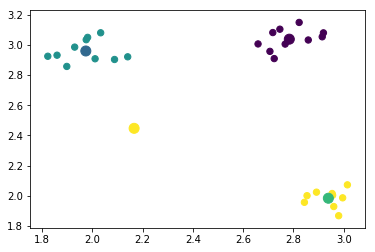

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/kmeans_data.csv')

# randomly initalize the centroids
K = 4
centroids = np.random.randn(K, 2)
centroids = centroids * np.std(data, 0)
centroids = centroids + np.mean(data, 0)

for iteration in range(5):
   # assign points to clusters
   deltas = data[:, np.newaxis, :] - centroids
   distances = np.sqrt(np.sum((deltas) ** 2, 2))
   closest = distances.argmin(1)

   # calculate new centroids
   centroids_new = np.array([data[closest == i, :].mean(0) for i in range(K)])
   centroids_new[np.isnan(centroids_new)] = centroids[np.isnan(centroids_new)]
   centroids = centroids_new

# plot 
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(K), s=100)

## $\color{green}{\text{Excercise}}$ Memory or speed

Replace the assignment and calculation of new clusters with a for loop. Which implementation would be preferable for small (few observations and dimensions) and which for large datasets (large number of observations and dimensions).

[Previous: Broadcasting](broadcasting.ipynb)<br>[Next: Test yourself](test_yourself.ipynb)